# Logistic Regression Baseline Model

Train a logistic regression baseline using WOE (Weight of Evidence) encoding for interpretable credit risk prediction.

## 1. Setup

In [1]:
# Core data science libraries
import pandas as pd
from test_case_fairmoney.utils.woe_encoding import (
    woe_encoding_categorical_with_iv,
    woe_encoding_numerical_with_iv,
)
from test_case_fairmoney.utils.constants import PATH_DATA_COMPRESSED
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from test_case_fairmoney.utils.model_validation import plot_AUC, plot_PR

## 2. Load Data

In [2]:
df_train = pd.read_parquet(PATH_DATA_COMPRESSED / "df_train.parquet")
df_val = pd.read_parquet(PATH_DATA_COMPRESSED / "df_val.parquet")
df_test = pd.read_parquet(PATH_DATA_COMPRESSED / "df_test.parquet")
# df_test = pd.concat([df_val, df_test], axis=0).reset_index(drop=True)

## 3. Define Features

In [3]:
target = "default"
feat_cat = [
    "credit_history",
    "purpose",
    "personal_status",
    "other_debtors",
    "property",
    "installment_plan",
    "housing",
    "foreign_worker",
    "job",
    "gender",
    "telephone_country_code",
    "telephone_mobile_network",
    "is_checking_negative",
]
feat_num = [
    "checking_balance",
    "months_loan_duration",
    "amount",
    "savings_balance",
    "installment_rate",
    "existing_credits",
    "dependents",
    "residence_months",
    "employment_months",
]

## 4. WOE Encoding - Numerical Features

Processing feature: checking_balance


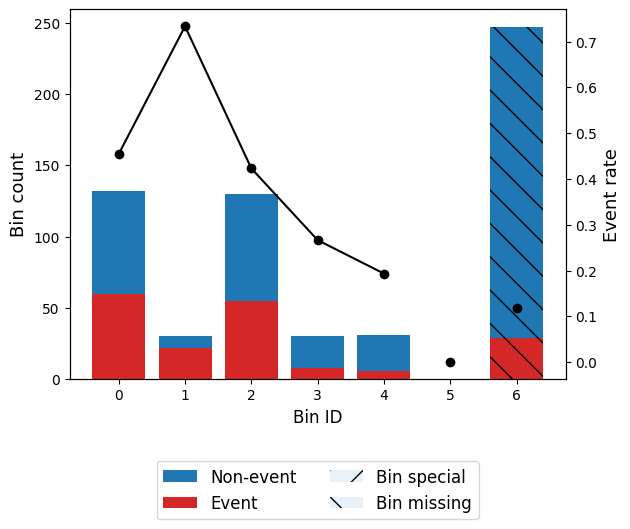

  IV - Train: 0.8029, Val: 0.0478, Test: 0.1488
Processing feature: months_loan_duration


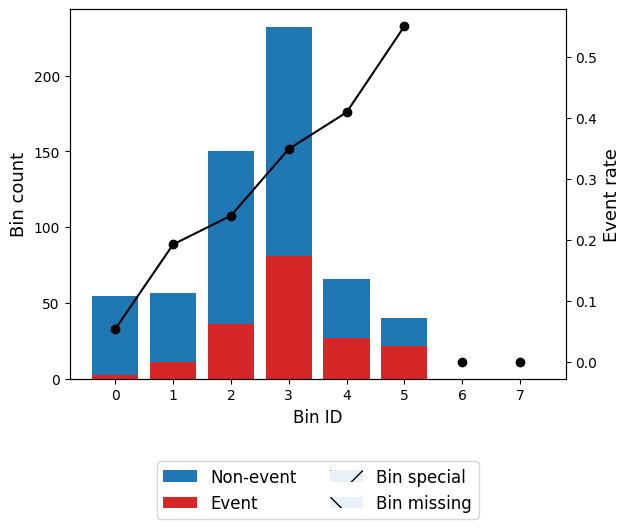

  IV - Train: 0.3958, Val: 0.1664, Test: 0.3170
Processing feature: amount


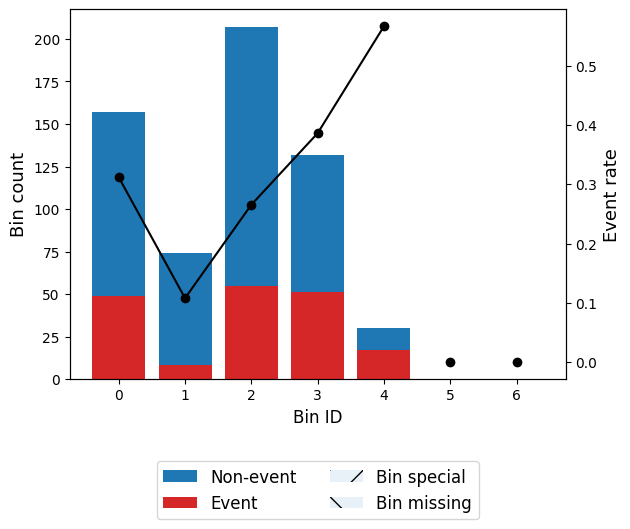

  IV - Train: 0.2584, Val: 0.1760, Test: 0.3117
Processing feature: savings_balance


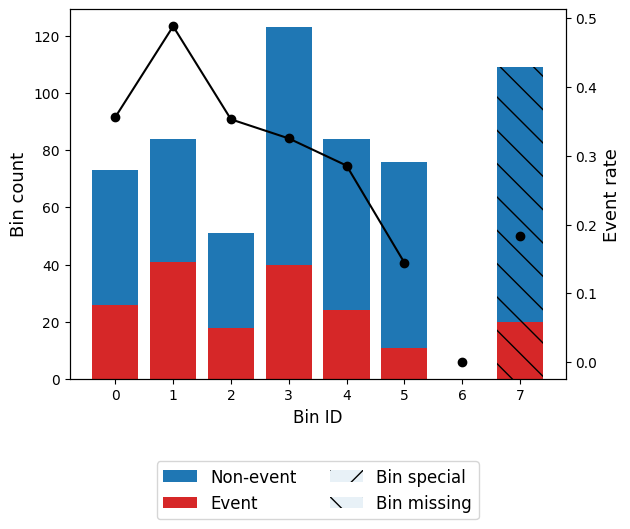

  IV - Train: 0.2694, Val: 0.3722, Test: 0.1394
Processing feature: installment_rate


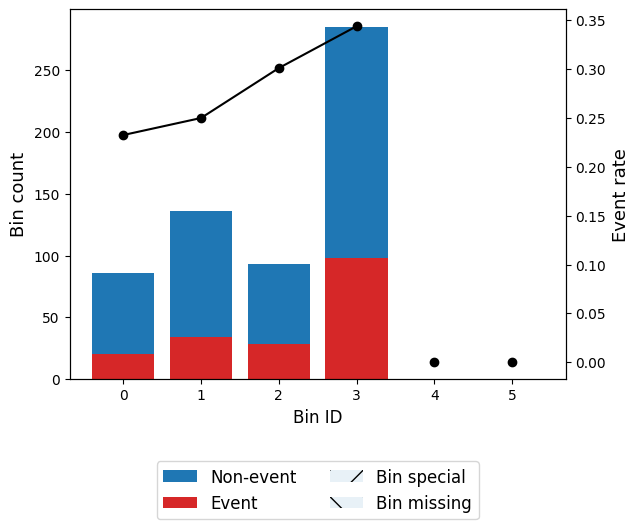

  IV - Train: 0.0495, Val: 0.0161, Test: 0.0085
Processing feature: existing_credits


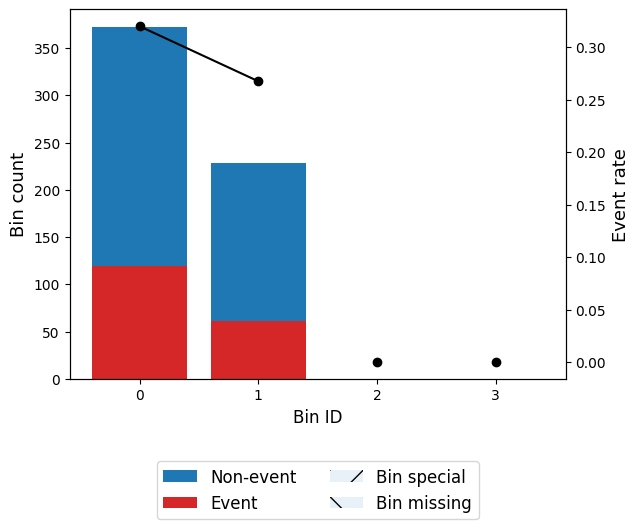

  IV - Train: 0.0149, Val: 0.0025, Test: 0.0073
Processing feature: dependents


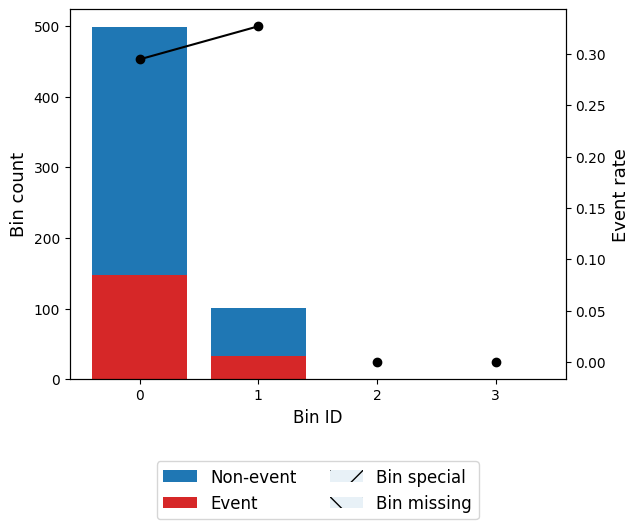

  IV - Train: 0.0032, Val: 0.0061, Test: 0.0231
Processing feature: residence_months


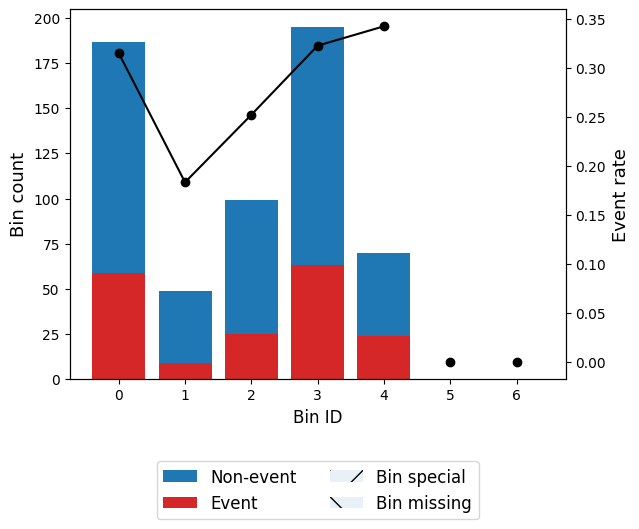

  IV - Train: 0.0482, Val: 0.1018, Test: 0.1782
Processing feature: employment_months


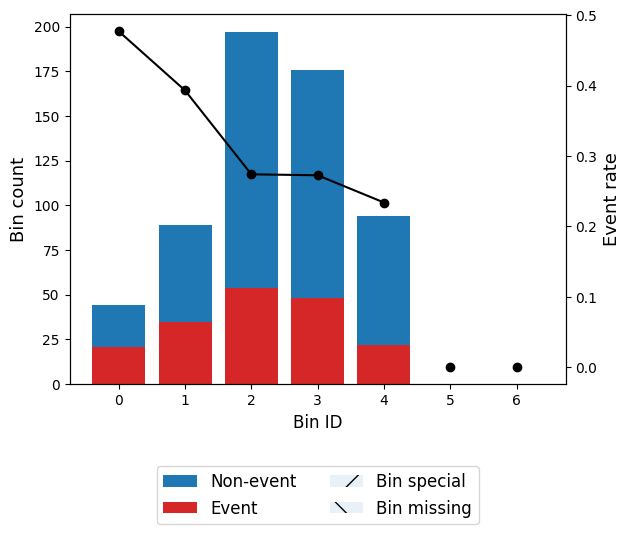

  IV - Train: 0.1009, Val: 0.2772, Test: 0.1911

Total numerical features: 9
Selected features (IV_train > 0.01): 8

WOE-encoded datasets created:
  Train: (600, 9)
  Validation: (200, 9)
  Test: (200, 9)

Top 10 features by IV:
            features  IV_train  IV_val  IV_test  IV_avg
    checking_balance    0.8029  0.0478   0.1488  0.3332
months_loan_duration    0.3958  0.1664   0.3170  0.2931
     savings_balance    0.2694  0.3722   0.1394  0.2603
              amount    0.2584  0.1760   0.3117  0.2487
   employment_months    0.1009  0.2772   0.1911  0.1897
    installment_rate    0.0495  0.0161   0.0085  0.0247
    residence_months    0.0482  0.1018   0.1782  0.1094
    existing_credits    0.0149  0.0025   0.0073  0.0082
          dependents    0.0032  0.0061   0.0231  0.0108


In [4]:
results_num = woe_encoding_numerical_with_iv(
    df_train=df_train,
    df_val=df_val,
    df_test=df_test,
    feat_num=feat_num,
    target=target,
    iv_threshold=0.01,
    plot_event_rate=True,
    verbose=True,
)

In [5]:
df_train_num_woe = results_num["df_train_woe"]
df_val_num_woe = results_num["df_val_woe"]
df_test_num_woe = results_num["df_test_woe"]
df_IV_num = results_num["df_iv"]
feat_num_select = results_num["selected_features"]

## 5. WOE Encoding - Categorical Features

WOE Encoding (Categorical):   0%|          | 0/13 [00:00<?, ?it/s]

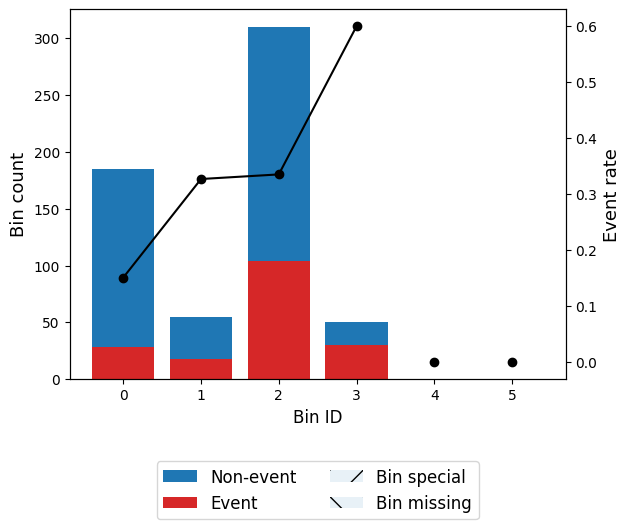

WOE Encoding (Categorical):   8%|▊         | 1/13 [00:00<00:01,  7.09it/s]

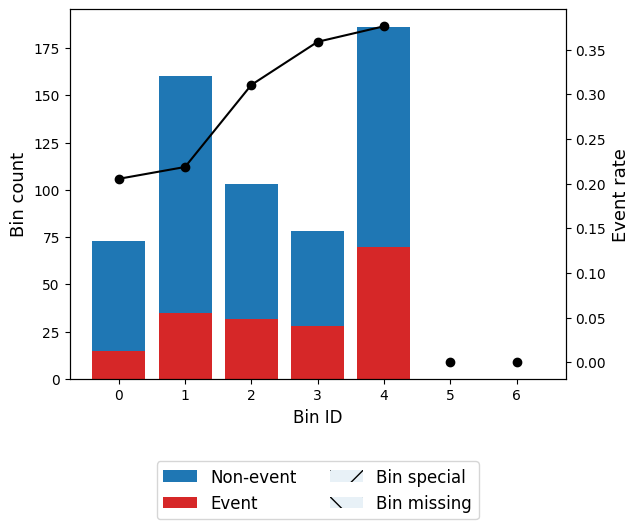

WOE Encoding (Categorical):  15%|█▌        | 2/13 [00:00<00:01,  7.11it/s]

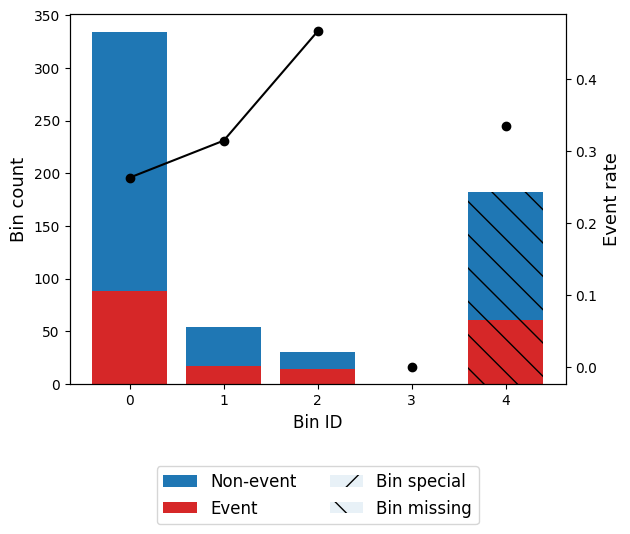

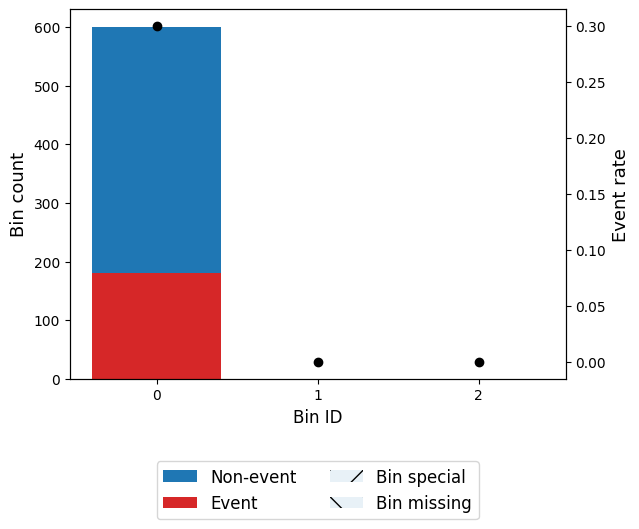

WOE Encoding (Categorical):  31%|███       | 4/13 [00:00<00:00, 10.14it/s]

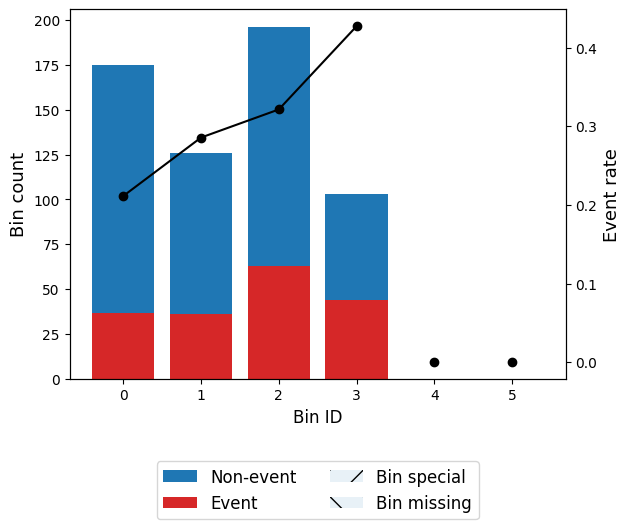

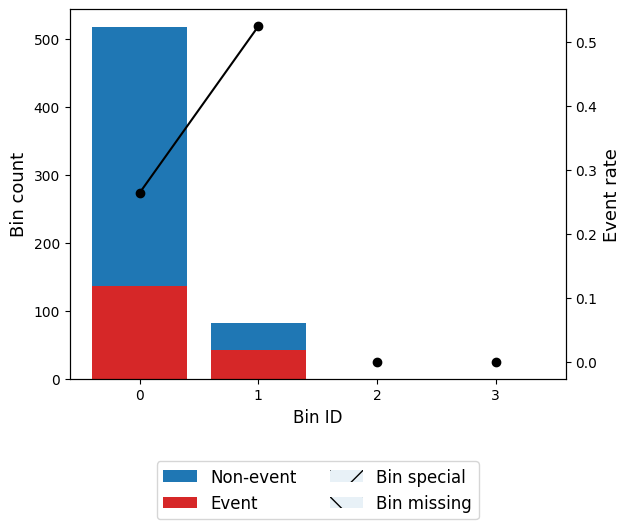

WOE Encoding (Categorical):  46%|████▌     | 6/13 [00:00<00:00, 12.34it/s]

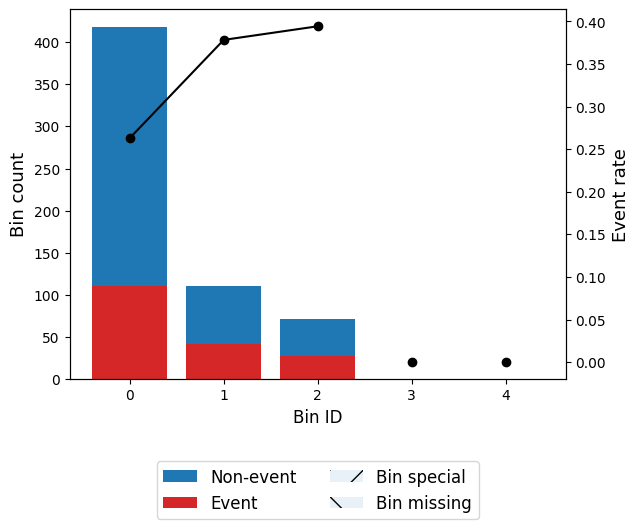

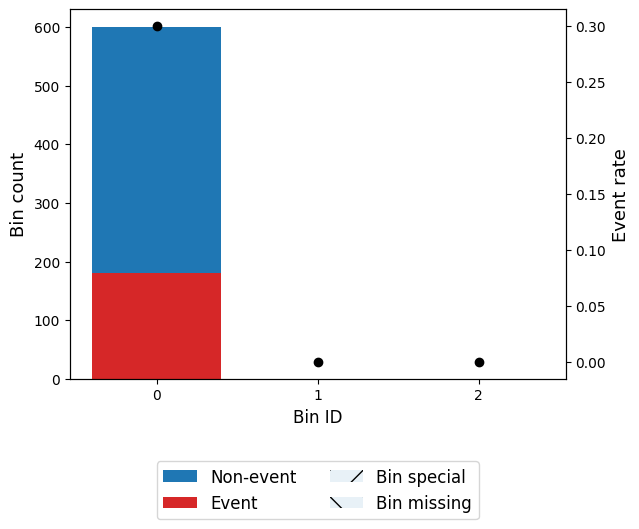

WOE Encoding (Categorical):  62%|██████▏   | 8/13 [00:00<00:00, 12.94it/s]

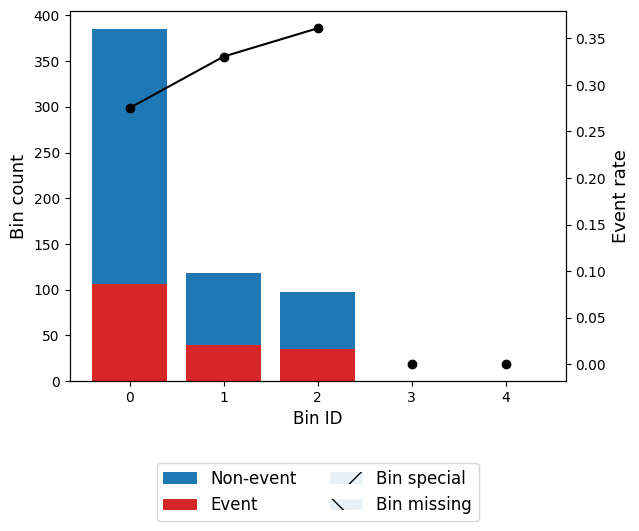

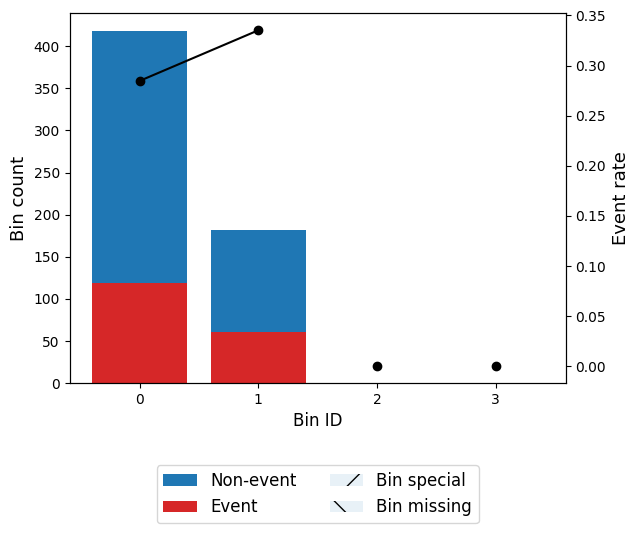

WOE Encoding (Categorical):  77%|███████▋  | 10/13 [00:00<00:00, 12.16it/s]

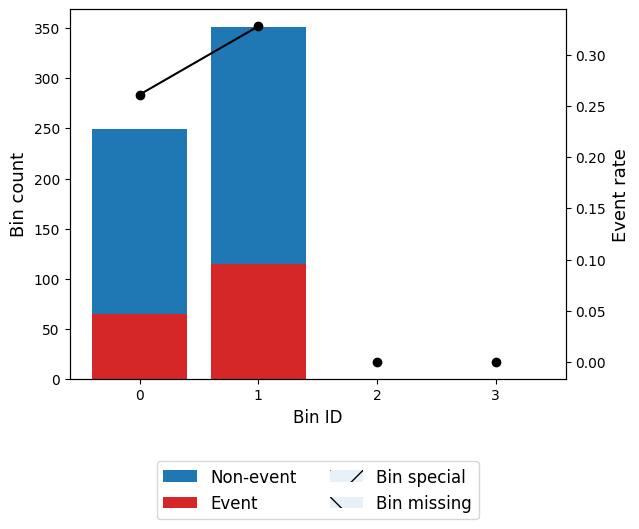

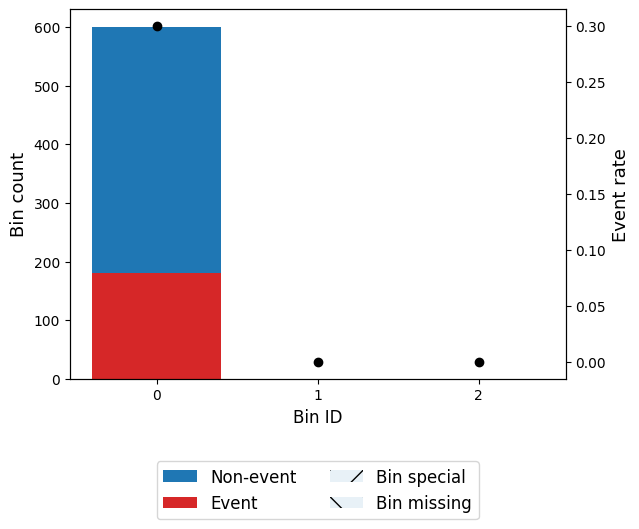

WOE Encoding (Categorical):  92%|█████████▏| 12/13 [00:00<00:00, 13.38it/s]

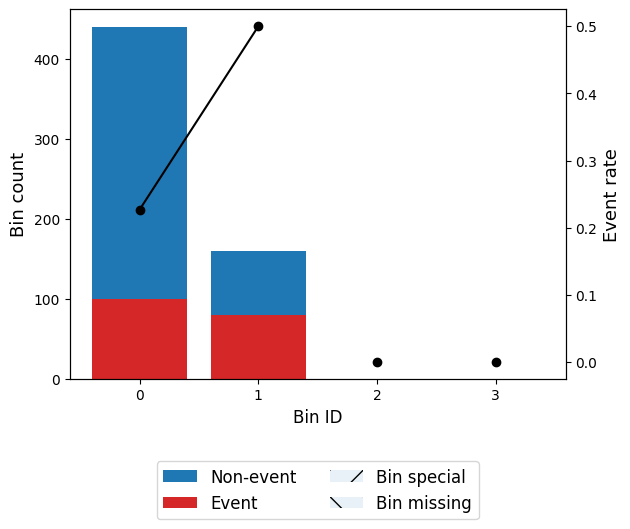

WOE Encoding (Categorical): 100%|██████████| 13/13 [00:01<00:00, 12.34it/s]


✅ Successfully processed: 13 features
Total categorical features: 13
Selected features (IV_train > 0.01): 10

WOE-encoded datasets created:
  Train: (600, 13)
  Validation: (200, 13)
  Test: (200, 13)

Top 10 categorical features by IV:
              features  IV_train  IV_val  IV_test  IV_avg  IV_std
        credit_history    0.3563  0.1059   0.4494  0.3039  0.1451
  is_checking_negative    0.3108  0.1392   0.4905  0.3135  0.1435
      installment_plan    0.1636  0.0046   0.0231  0.0638  0.0710
               purpose    0.1203  0.2020   0.3076  0.2100  0.0766
              property    0.1196  0.3218   0.0303  0.1572  0.1220
               housing    0.0688  0.1687   0.0662  0.1012  0.0477
       personal_status    0.0545  0.0467   0.0047  0.0353  0.0219
                   job    0.0260  0.1012   0.0248  0.0507  0.0358
telephone_country_code    0.0248  0.0115   0.0012  0.0125  0.0097
                gender    0.0120  0.1539   0.0076  0.0578  0.0679


In [6]:
results_cat = woe_encoding_categorical_with_iv(
    df_train=df_train,
    df_val=df_val,
    df_test=df_test,
    feat_cat=feat_cat,
    target=target,
    iv_threshold=0.01,
    plot_event_rate=True,
    verbose=True,
    show_progress=True,
    handle_errors=True,
)

In [7]:
df_train_sc_woe = results_cat["df_train_woe"]
df_val_sc_woe = results_cat["df_val_woe"]
df_test_sc_woe = results_cat["df_test_woe"]
df_IV_sc = results_cat["df_iv"]
feat_sc_select = results_cat["selected_features"]

## 6. Combine WOE Features

In [ ]:
#as expected, weak features in EDA is already removed by IV
df_train_woe = pd.concat(
    [
        df_train_num_woe[feat_num_select],
        df_train_sc_woe[feat_sc_select],
    ],
    axis=1,
)
df_test_woe = pd.concat(
    [
        df_test_num_woe[feat_num_select],
        df_test_sc_woe[feat_sc_select],
    ],
    axis=1,
)
df_val_woe = pd.concat(
    [
        df_val_num_woe[feat_num_select],
        df_val_sc_woe[feat_sc_select],
    ],
    axis=1,
)
print(df_train_woe.shape, df_test_woe.shape, df_val_woe.shape)

(600, 18) (200, 18) (200, 18)


In [19]:
print(f"✅ WOE features: {len(df_train_woe.columns)}")
print(df_train_woe.columns.tolist())

✅ WOE features: 18
['checking_balance', 'months_loan_duration', 'savings_balance', 'amount', 'employment_months', 'installment_rate', 'residence_months', 'existing_credits', 'credit_history', 'is_checking_negative', 'installment_plan', 'purpose', 'property', 'housing', 'personal_status', 'job', 'telephone_country_code', 'gender']


## 7. Train Logistic Regression

In [20]:
selected_features = [
    "checking_balance",
    "months_loan_duration",
    "savings_balance",
    "amount",
    "employment_months",
    "installment_rate",
    "residence_months",
    "existing_credits",
    "credit_history",
    "is_checking_negative",
    "installment_plan",
    "purpose",
    "property",
    "housing",
    "personal_status",
    "job",
    "telephone_country_code",
    "gender",
]
model = LogisticRegression(penalty="l2", C=0.1, max_iter=1000, random_state=42)
model.fit(df_train_woe[selected_features], df_train[target])

# Generate predictions
pred_train = model.predict_proba(df_train_woe[selected_features])[:, 1]
pred_val = model.predict_proba(df_val_woe[selected_features])[:, 1]
pred_test = model.predict_proba(df_test_woe[selected_features])[:, 1]

print("✅ Model trained")

✅ Model trained


## 8. Evaluate Performance

In [21]:
# Calculate and display performance metrics
print("\n" + "=" * 60)
print("FINAL MODEL PERFORMANCE METRICS")
print("=" * 60)
print(f"Train AUC: {roc_auc_score(df_train[target], pred_train):.4f}")
print(f"Validation AUC: {roc_auc_score(df_val[target], pred_val):.4f}")
print(f"Test AUC: {roc_auc_score(df_test[target], pred_test):.4f}")
print(f"Train PR-AUC: {average_precision_score(df_train[target], pred_train):.4f}")
print(f"Validation PR-AUC: {average_precision_score(df_val[target], pred_val):.4f}")
print(f"Test PR-AUC: {average_precision_score(df_test[target], pred_test):.4f}")


FINAL MODEL PERFORMANCE METRICS
Train AUC: 0.8481
Validation AUC: 0.7056
Test AUC: 0.7474
Train PR-AUC: 0.6982
Validation PR-AUC: 0.4853
Test PR-AUC: 0.5669


### ROC-AUC Curves

In [22]:
print("ROC-AUC Analysis and Visualization")
plot_AUC(
    df_train[target],  # Train true labels
    pred_train,  # Train predictions
    df_val[target],  # Validation true labels
    pred_val,  # Validation predictions
    df_test[target],  # Test true labels
    pred_test,  # Test predictions
)

ROC-AUC Analysis and Visualization


ROC-AUC Analysis and Visualization


### Precision-Recall Curves

In [23]:
# Precision-Recall curve analysis and visualization
print("Precision-Recall Analysis and Visualization")
plot_PR(
    df_train[target],  # Train true labels
    pred_train,  # Train predictions
    df_test[target],  # Test true labels
    pred_test,  # Test predictions
    df_val[target],  # Validation true labels
    pred_val,  # Validation predictions
)

Precision-Recall Analysis and Visualization


Precision-Recall Analysis and Visualization
